We can use higher order level-spacing distributions to find the expected resonance counts in an interval. We will assume the mean level-spacing is 1.0, "x" is the full energy range we are considering and "N" are the number of resonances in the interval that are worth considering. We can find the likelihood of such a number of resonances being seen in the energy range.

Higher-Order Level-Spacing Distribution equations come from the following journal article:

https://journals.aps.org/pre/pdf/10.1103/PhysRevE.60.5371

10.1103/physreve.60.5371

n ± n_std = 15.008 ± 1.352


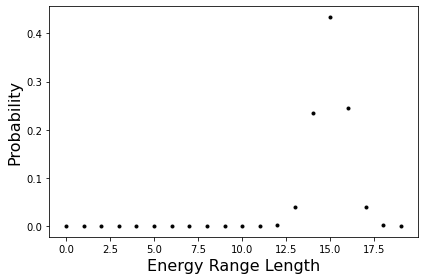

In [2]:
x = 16
N = range(20)

# ======================================================

import numpy as np
from scipy.special import gamma

import matplotlib.pyplot as plt

N = np.array(N)

def high_order_level_spacing(X,n):
    a = (n**2 + 5*n + 2)/2
    g1 = gamma(a/2+1)
    g2 = gamma((a+1)/2)
    B = (g1 / ((n+1) * g2))**2
    A = 2 * B**((a+1)/2) / g2

    return A * X**a * np.exp(-B * X**2)

probs = np.array([high_order_level_spacing(x,n) for n in N])
probs /= np.sum(probs)

n_avg = np.sum(probs * N)
n_std = np.sqrt(np.sum(probs * (N - x)**2))
print(f'n \u00B1 n_std = {n_avg:.3f} \u00B1 {n_std:.3f}')

plt.figure()
plt.plot(N,probs, '.k')
plt.xlabel('Energy Range Length', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.tight_layout()
plt.show()

Although the number of resonances can increase, the uncertainty stays low. We get numerical stability though. We can use the central limit approximation to get more stable results.

The following script tests the full and approximated functions.

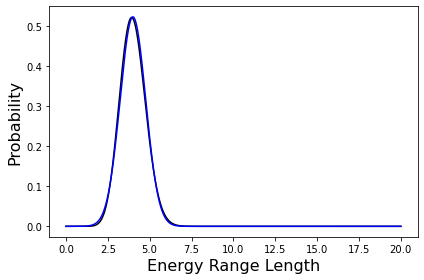

In [3]:
X = np.linspace(0,20,1000)
n = 3
# ==========================================
import math
from scipy.stats import norm

def gamma_ratio(x):
    """ Gamma(x/2) / Gamma((x-1)/2) """
    if hasattr(x,'__iter__'):
        r = []
        for w in x:
            q = 1.0 / math.sqrt(math.pi)
            for i in range(3,int(w)):
                q = (i-2) / (2*q)
            r.append(q)
        r = np.array(r)
    else:
        r = 1.0 / math.sqrt(math.pi)
        for i in range(3,int(x)+1):
            r = (i-2) / (2*r)
    return r

def high_order_variance(n):
    a = (n**2 + 5*n + 2)/2
    g2d1 = gamma_ratio(a+2)
    # g2d1 = gamma((a+2)/2) / gamma((a+1)/2)
    rB = g2d1 / (n+1)
    B  = rB**2
    # A  = 2 * rB**(a+1) / g1
    # return (a+1)/(2*B) + n**2 - 2*n*(n+1)
    return (a+1)/(2*B) - (n+1)**2

def high_order_level_spacing_aprox(X,n):
    sig = np.sqrt(high_order_variance(n))
    return norm.pdf(X, n+1, sig)

P_true  = high_order_level_spacing(X,n)
P_aprox = high_order_level_spacing_aprox(X,n)

plt.figure()
plt.plot(X,P_true,  '-k')
plt.plot(X,P_aprox, '-b')
plt.xlabel('Energy Range Length', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.tight_layout()

Now we have a code that can give probabilities on the expected number of resonances for higher "N".

n ± n_std = 30.000 ± 1.928


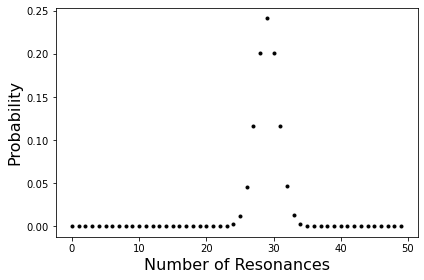

In [4]:
x = 30
N = np.array(range(50))
# ==========================================

probs = high_order_level_spacing_aprox(x,N)
probs /= np.sum(probs)

n_std_aprox = np.sqrt(np.sum(probs * (N - x)**2))
print(f'n \u00B1 n_std = {x:.3f} \u00B1 {n_std_aprox:.3f}')

plt.figure()
plt.plot(N,probs, '.k')
plt.xlabel('Number of Resonances', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.tight_layout()
plt.show()


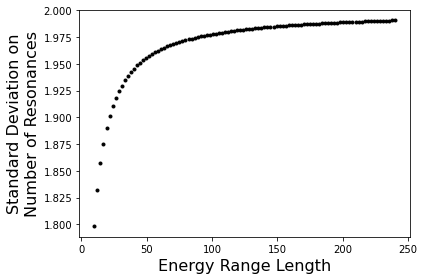

In [5]:
X = np.linspace(10,240,100)
N = np.array(range(250))
# ==========================================

n_std = np.zeros(X.shape)
for idx, x in enumerate(X):
    probs = high_order_level_spacing_aprox(x,N)
    probs /= np.sum(probs)

    n_std[idx] = np.sqrt(np.sum(probs * (N - x)**2))
    # print(f'n \u00B1 n_std = {x:.3f} \u00B1 {n_std_aprox:.3f}')

plt.figure()
plt.plot(X,n_std, '.k')
plt.ylabel('Standard Deviation on\nNumber of Resonances', fontsize=16)
plt.xlabel('Energy Range Length', fontsize=16)
plt.tight_layout()
plt.show()

As you can see, the standard deviation in number of resonances over an interval is very small for a sufficient number of resonances.

Additionally, we can get an uncertainty on mean level-spacing.

In [6]:
x = 100
n = 100
MLSs = np.linspace(0.1,10,100000)
# ==========================================



probs = high_order_level_spacing_aprox(x/MLSs,n)
probs /= np.sum(probs)

MLS_mean = np.sum(probs * MLSs)
MLS_std  = np.sqrt(np.sum(probs * (MLSs - x/n)**2))

print(f'Predicted Freq_mean  = {n/x:.4f}')
print(f'Freq_mean \u00B1 Freq_std = {MLS_mean:.4f} \u00B1 {MLS_std:.4f}')



Predicted Freq_mean  = 1.0000
Freq_mean ± Freq_std = 0.9904 ± 0.0136


We will have the number of resonances also match the energy range since it is only changed through scaling. We test multiple numbers of resonances against possible mean level-spacings to find the standard deviation on the mean level-spacing.

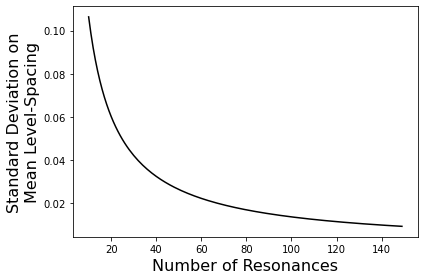

In [7]:
Scale = np.arange(10,150)
MLSs  = np.linspace(-0.05,20,400000)
# ==========================================

MLS_std = np.zeros(Scale.shape)
for idx, scale in enumerate(Scale):
    probs = high_order_level_spacing_aprox(scale/MLSs, scale)
    probs /= np.sum(probs)
    MLS_std[idx] = np.sqrt(np.sum(probs * (MLSs - 1.0)**2))

plt.figure()
plt.plot(Scale, MLS_std, '-k')
plt.xlabel('Number of Resonances', fontsize=16)
plt.ylabel('Standard Deviation on\nMean Level-Spacing', fontsize=16)
plt.tight_layout()
plt.show()

# Extra code:

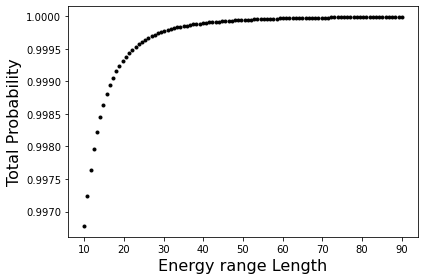

In [8]:
X = np.linspace(10,90,100)
N = np.array(range(100))
# ==========================================

tot_prob = np.zeros(X.shape)
for idx, x in enumerate(X):
    tot_prob[idx] = np.sum(high_order_level_spacing_aprox(x,N))

plt.figure()
plt.plot(X, tot_prob, '.k')
plt.ylabel('Total Probability', fontsize=16)
plt.xlabel('Energy range Length', fontsize=16)
plt.tight_layout()
plt.show()

## Poissonian Standard Deviation

...

In [9]:
N = 100
K = 100
# ===========================================
X = np.linspace(0,10,K)
R = np.zeros((N,K))
for idx, x in enumerate(X):
    R[idx,:] = np.random.poisson(idx,(N,))



# Linear Fit:

...

Text(0, 0.5, 'Standard deviation in\nMean level density')

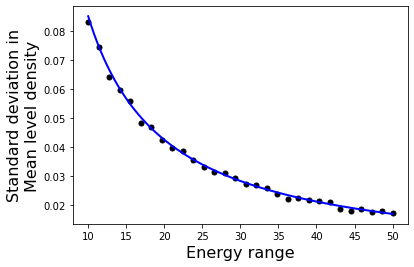

In [16]:
from scipy.optimize import minimize
def DeltaMehta3AB(X, XB:tuple, A:float, B:float):
    N  = len(X)
    H  = np.arange(N+1)
    Y  = A*X+B
    PB = (A*XB[0]+B, A*XB[1]+B-N)
    P1 = Y-H[:-1]
    P2 = Y-H[1:]
    return (np.sum(P1**3 - P2**3) + (PB[1]**3 - PB[0]**3))/(3*A*(XB[1]-XB[0]))
    # return (np.sum(P1**2 + P1*P2 + P2**2) + (A*(XB[1]-XB[0])-N)*(PB[1]**2+PB[1]*PB[0]+PB[0]**2))/(3*A*(XB[1]-XB[0]))
def DeltaMehta3(X, XB:tuple, MF:float=0.0):
    N = len(X)
    A0 = (1-MF)*N/(XB[1]-XB[0])
    def func(indvars):  return DeltaMehta3AB(X, XB, *indvars)
    sol  = minimize(func, x0=(A0,0))
    a,b = sol.x
    D3 = DeltaMehta3AB(X, XB, a, b)
    return D3, a, b
def PredictedDM3(n):
    return math.pi**(-2) * (math.log(n) - 0.0687)



def WigSemicircleCDF(x):
    """
    CDF of Wigner's semicircle law distribution
    """
    return (x/np.pi) * np.sqrt(1.0 - x**2) + np.arcsin(x)/np.pi + 0.5
def SampleGOE(Freq:float, EB:tuple, seed:int=None):
    """
    Sample from the Gaussian Orthogonal Ensemble (GOE)
    """

    # Since the eigenvalues do not follow the semicircle distribution
    # exactly, there is a small chance for some values that would never
    # occur with semicircle distribution. Therefore, we make extra
    # eigenvalues and use the ones that are needed. As extra precaution,
    # we select eigenvalues within a margin of the edges of the semicircle
    # distribution.
    margin = 0.1
    N_res_est = Freq*(EB[1]-EB[0])
    N_Tot = round((1 + 2*margin) * N_res_est)

    if seed is None:
        seed = np.random.randint(10000)
    rng = np.random.default_rng(seed)

    sqrt2 = np.sqrt(2)
    H = rng.normal(size=(N_Tot,N_Tot)) / sqrt2
    H += H.T
    H += sqrt2 * np.diag(rng.normal(size=(N_Tot,)) - np.diag(H))
    eigs = np.linalg.eigvals(H) / (2*np.sqrt(N_Tot))
    eigs.sort()
    eigs = eigs[eigs > -1.0+margin]
    eigs = eigs[eigs <  1.0-margin]

    E = EB[0] + N_Tot * (WigSemicircleCDF(eigs) - WigSemicircleCDF(-1.0+margin)) / Freq
    return E[E < EB[1]]

EMM = 50
N   = 30
Epochs = 500

Freqs = np.zeros((N,Epochs))
EM = np.linspace(10,EMM,N)
for idx, Em in enumerate(EM):
    for epoch in range(Epochs):
        E = SampleGOE(1, (0, Em))
        D3, A, B = DeltaMehta3(E, (0,Em))
        Freqs[idx, epoch] = A

Freq_std = np.std(Freqs, axis=1)

X = np.linspace(EM[0], EMM, 1000)
Y = 0.85/X

plt.figure()
plt.plot(EM, Freq_std, '.k', markersize=10)
plt.plot(X, Y, '-b', linewidth=2)
plt.xlabel('Energy range', fontsize=16)
plt.ylabel('Standard deviation in\nMean level density', fontsize=16)